# Chapter 8

In [72]:
library(randomForest)
library(ISLR)
library(MASS)
library(tree)
library (gbm)
library(glmnet)
#install.packages("Rfast", repos='http://cran.us.r-project.org')

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



## Problem 2

It is mentioned in Section 8.2.3 that boosting using depth-one trees
(or stumps) leads to an additive model.
Explain why this is the case. You can begin with (8.12) in
Algorithm 8.2.

If number of splits d =1 we have singl varible in functions in Eq.(12.8) and it is the same as additive models. 

## Problem3

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot
that displays each of these quantities as a function of $\hat{p}_{m1}$. The x-axis should display $\hat{p}_{m1}$, ranging from 0 to 1, and the y-axis should
display the value of the Gini index, classification error, and entropy

p=$\hat{p}_{m1}$, then $\hat{p}_{m2}$=1-p

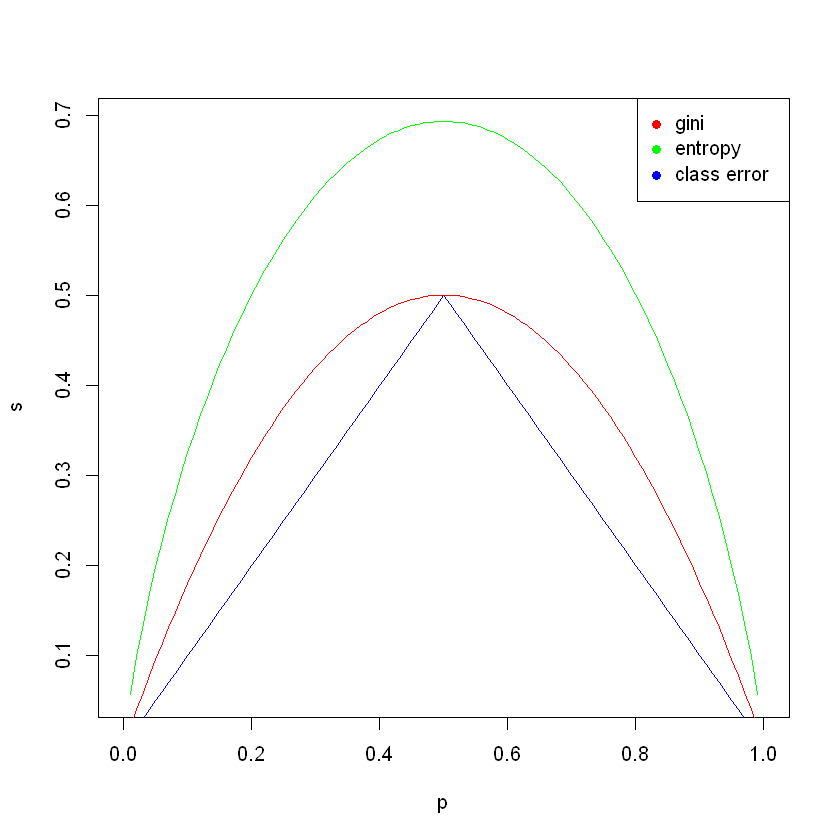

In [118]:
p=seq(0,1,0.01)
#entropy
s=-log(p)*p-(1-p)*log(1-p)
#error
E=1-pmax(p, 1-p)
#gini
g=2*p*(1-p)

plot(p, s, type = "l", col = "green")
lines(p, g, type = "l", col = "red")
lines(p, E, type = "l", col = "blue")
legend("topright",legend=c("gini","entropy", "class error"),pch=19,col=c("red", "green", "blue"))

## Problem 6

Provide a detailed explanation of the algorithm that is used to fit a
regression tree.

We do binary tree splitting on conditions. As the rsult we divide the predictor space (set of possible p features $X_i$ values) into J distinct non-overlapping regions $R_j$.
For every observation that falls in $R_j$ we make the same prediction that is the mean of the response values for the training observations in R_j

Grow tree until each terminal node has few observations than some minimum number.

Apply pruning to obtain a sequence of best subtrees as function of parameter alpha.

Chose alpha to minimize average Kfold crossvalidation error.

## Problem 7

In the lab, we applied random forests to the Boston data using mtry=6
and using ntree=25 and ntree=500. Create a plot displaying the test
error resulting from random forests on this data set for a more comprehensive range of values for mtry and ntree. You can model your
plot after Figure 8.10. Describe the results obtained.

In [2]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
test = sample (1:nrow(Boston), nrow(Boston)/3)

In [4]:
set.seed(1)
num_trees=500
mtr=c(3, 6, 13)
trees=rep(NA, num_trees/25)
error=rep(NA, num_trees/25)
errors<-matrix(list(), nrow=20, ncol=3)
for(j in 1:3){
for(i in seq(1, num_trees/25)){
    rf.boston= randomForest( medv∼.,data=Boston[-test,],
    mtry=mtr[j], ntree = 1+(i-1)*25, importance =TRUE)
    yhat.bag = predict (rf.boston , newdata=Boston[test,])
    error[i]=mean((yhat.bag-Boston$medv[test])^2)
    } 
errors[1:20, j] = error
}


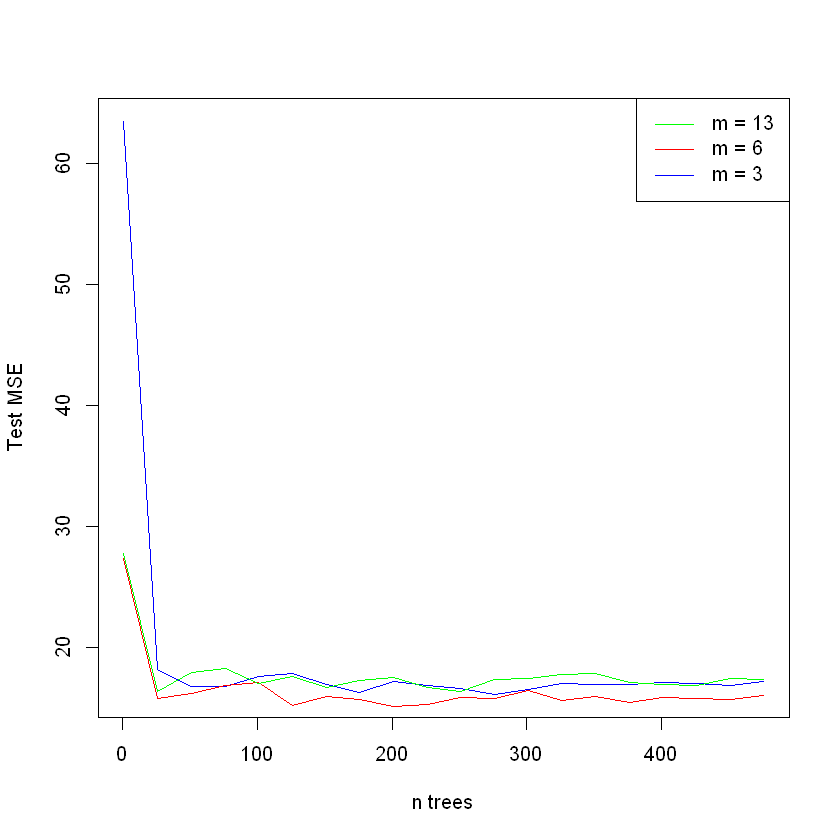

In [5]:
plot(seq(1, num_trees, by = 25), errors[1:20, 1], xlab = 'n trees', ylab = 'Test MSE', type = 'l', col="blue")
lines(seq(1, num_trees, by = 25), errors[1:20, 2], col="red")
lines(seq(1, num_trees, by = 25), errors[1:20, 3], col="green")
legend("topright", c("m = 13", "m = 6", "m = 3"), col = c("green", "red", "blue"), cex = 1, lty = 1)

## Problem 8

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.


(a) Split the data set into a training set and a test set.

In [6]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [7]:
test = sample (1:nrow(Carseats), nrow(Carseats)/3)
Carseats.train = Carseats[-test,]
Carseats.test = Carseats[test,]

Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

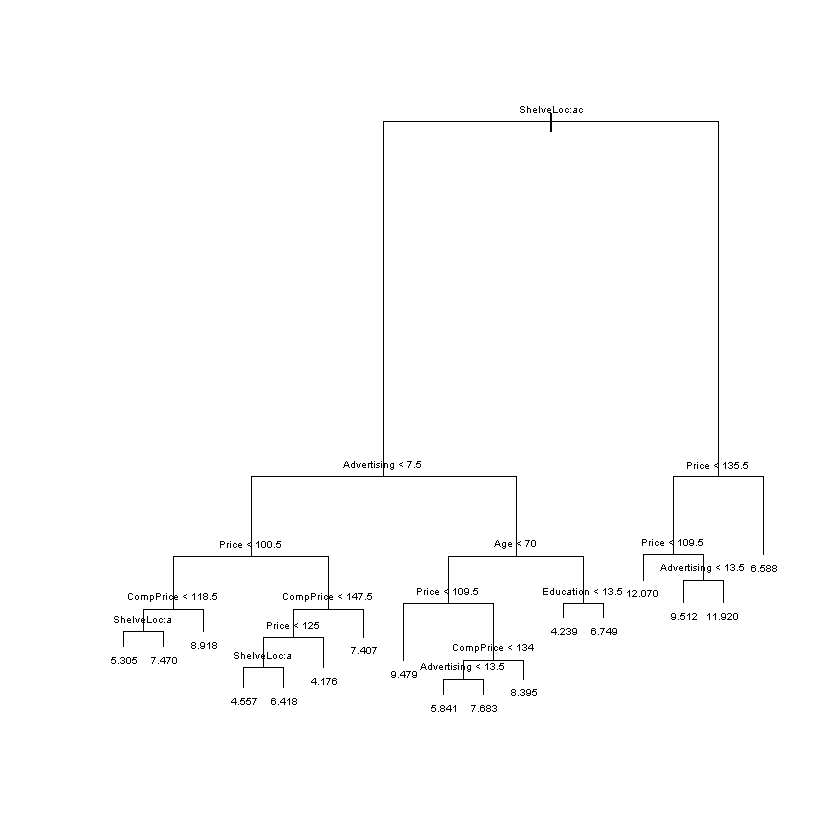

In [8]:
tree.carseats = tree(Sales∼., Carseats.train)
tree.pred=predict(tree.carseats, Carseats.test)
plot(tree.carseats)
text(tree.carseats, cex=.5)

In [9]:
mean((tree.pred-Carseats$Sales[test])^2)

[1] 5.001556

(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

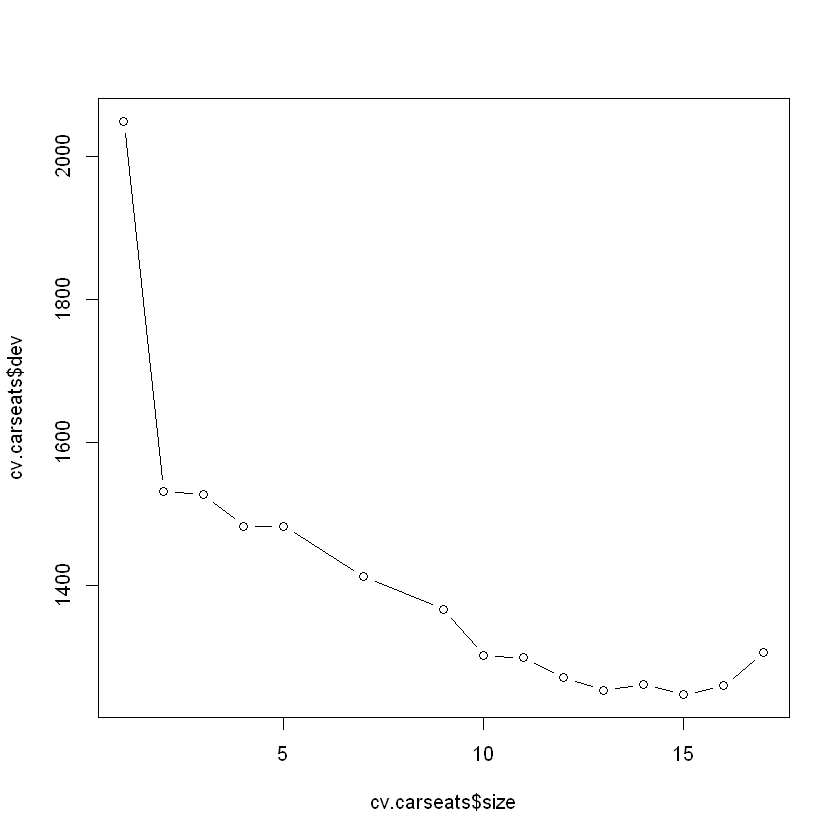

In [10]:
cv.carseats=cv.tree(tree.carseats)
plot(cv.carseats$size ,cv.carseats$dev ,type='b')

From plot above size 13, 15 must have minimum error on cv. 

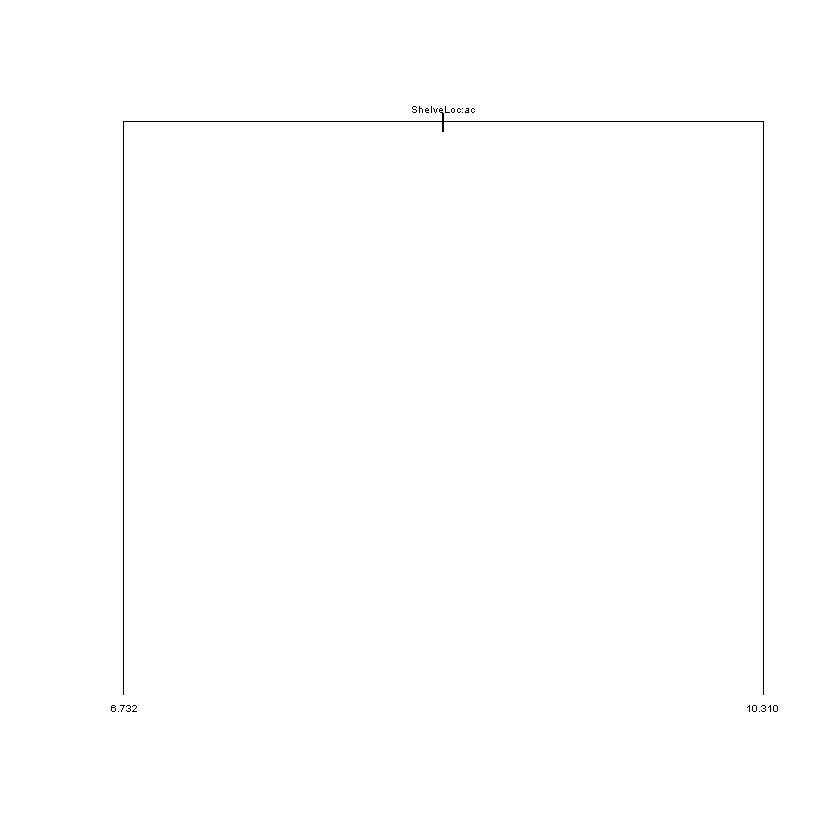

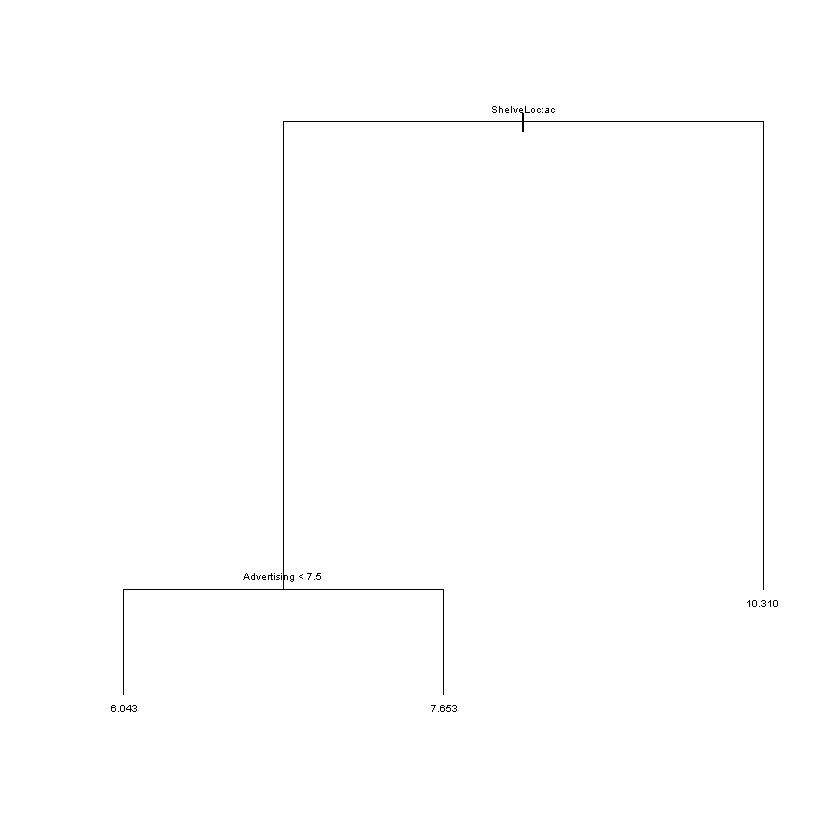

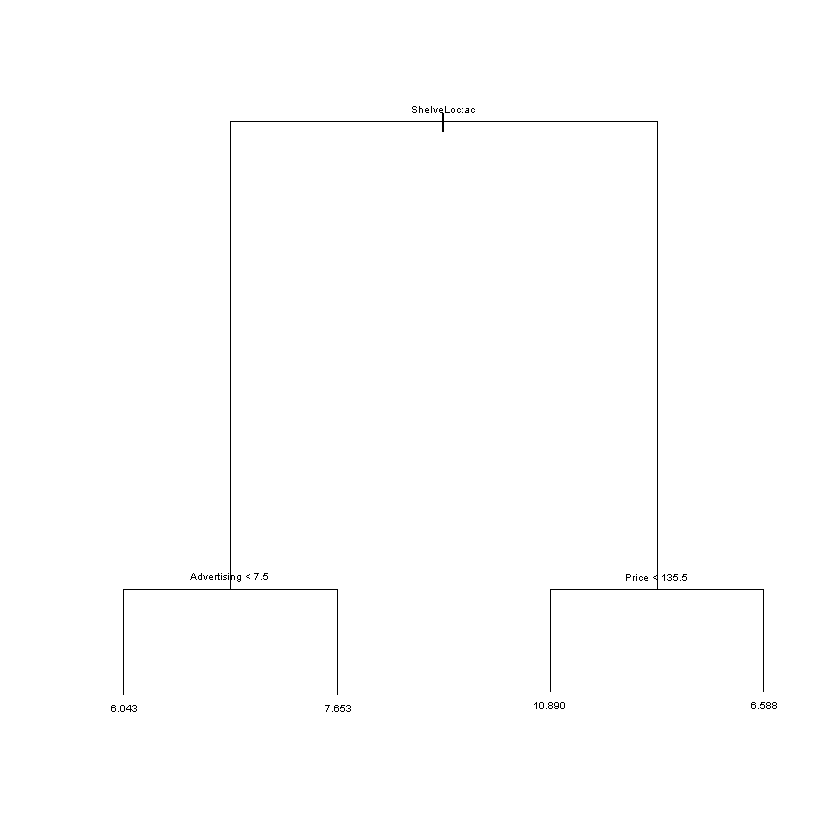

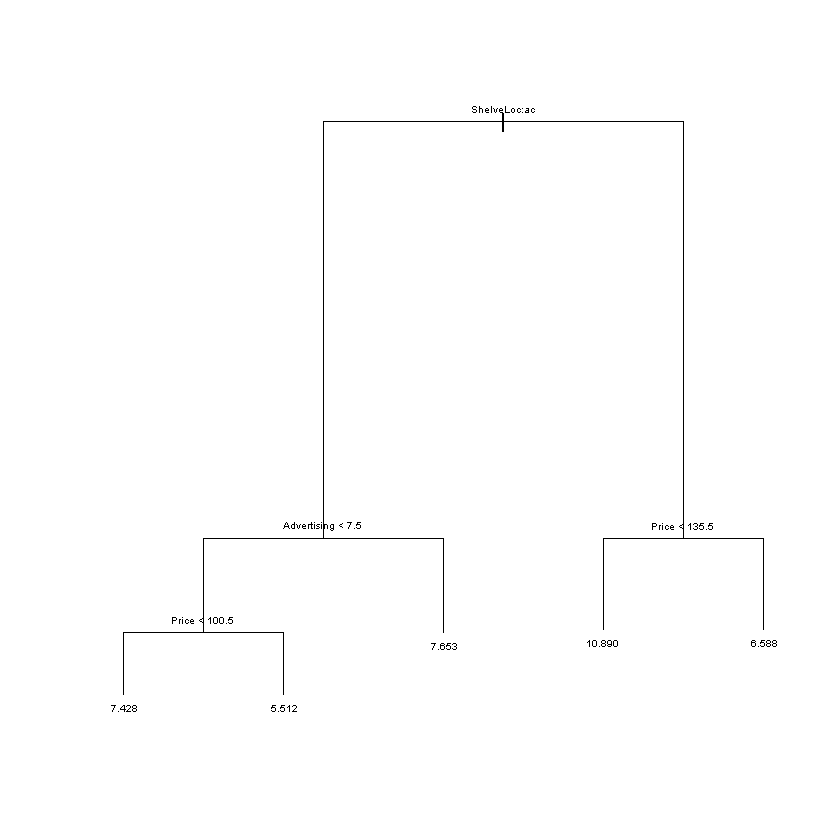

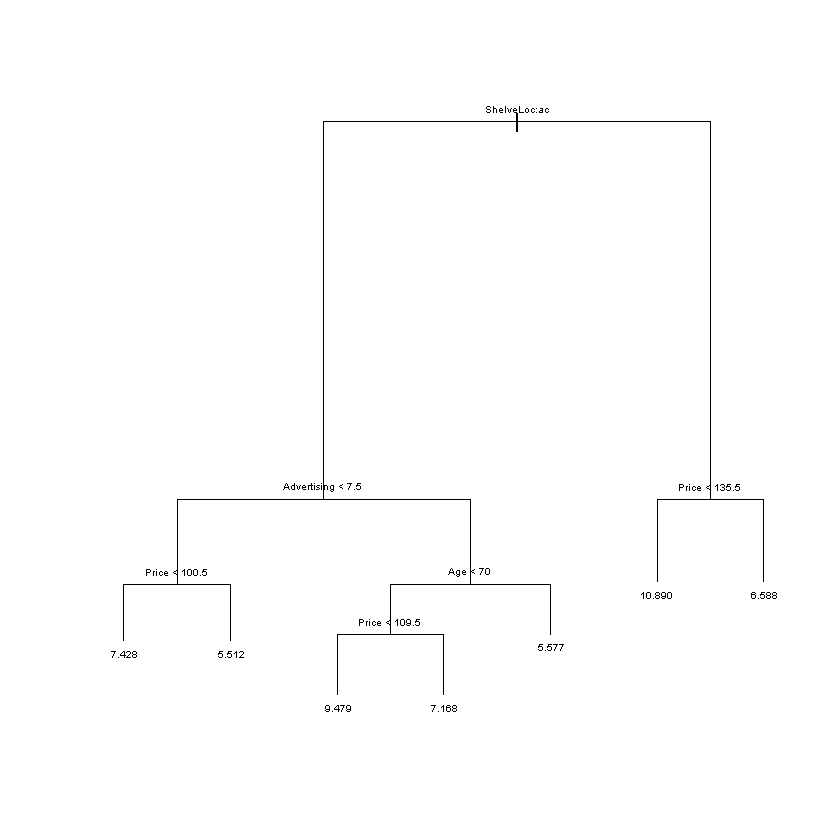

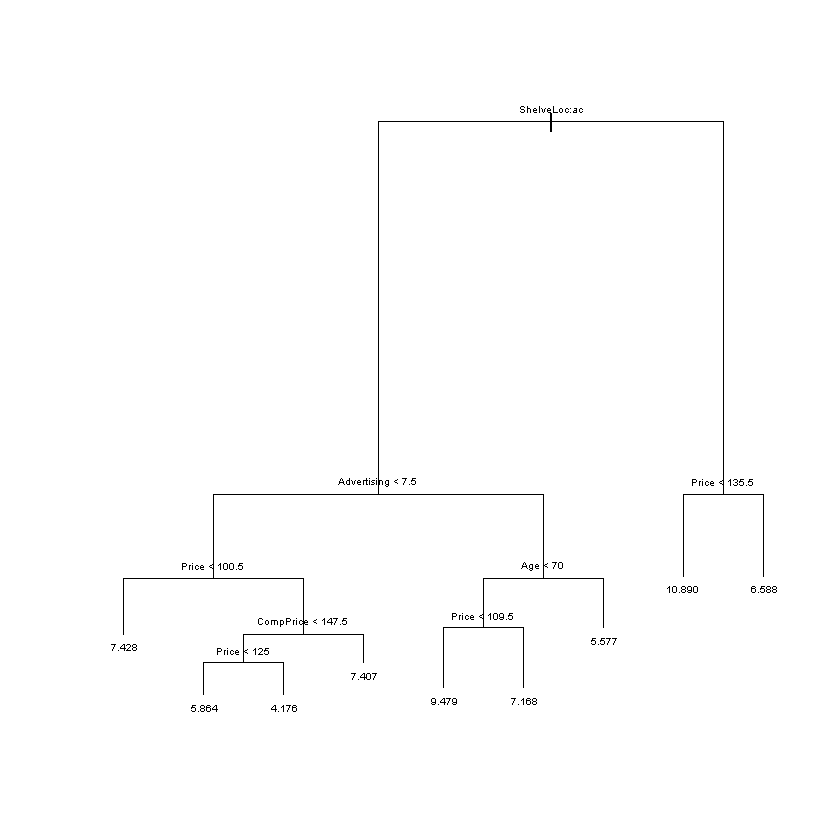

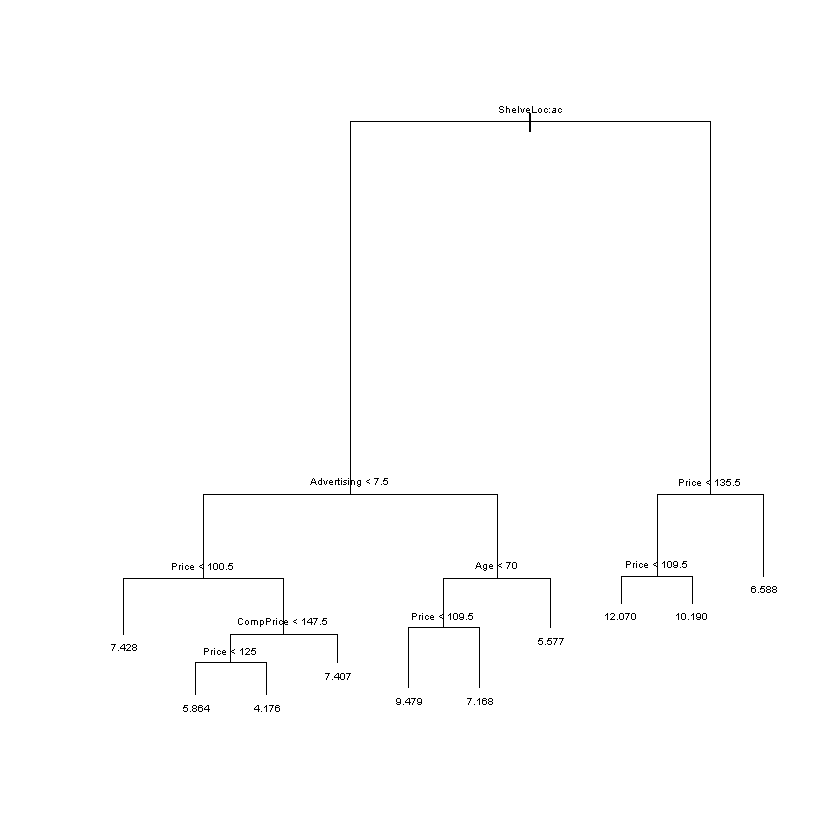

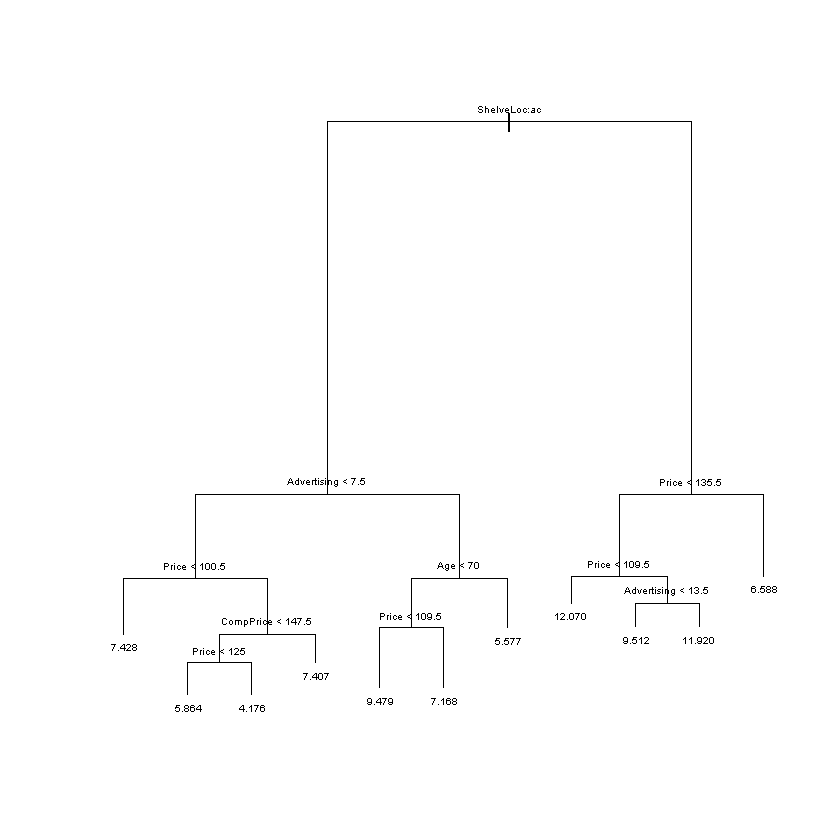

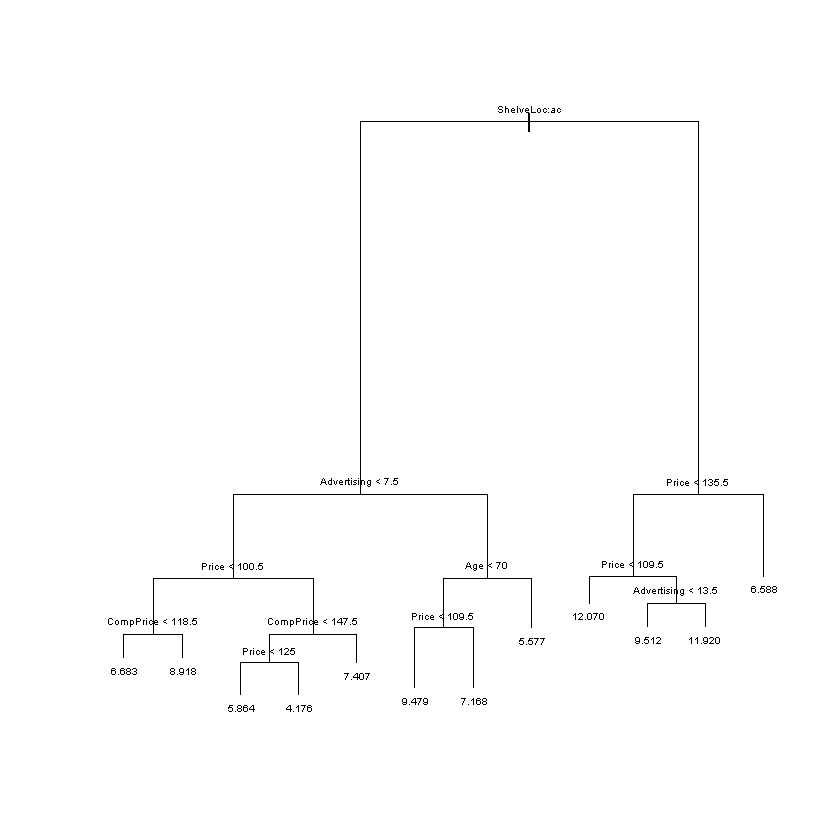

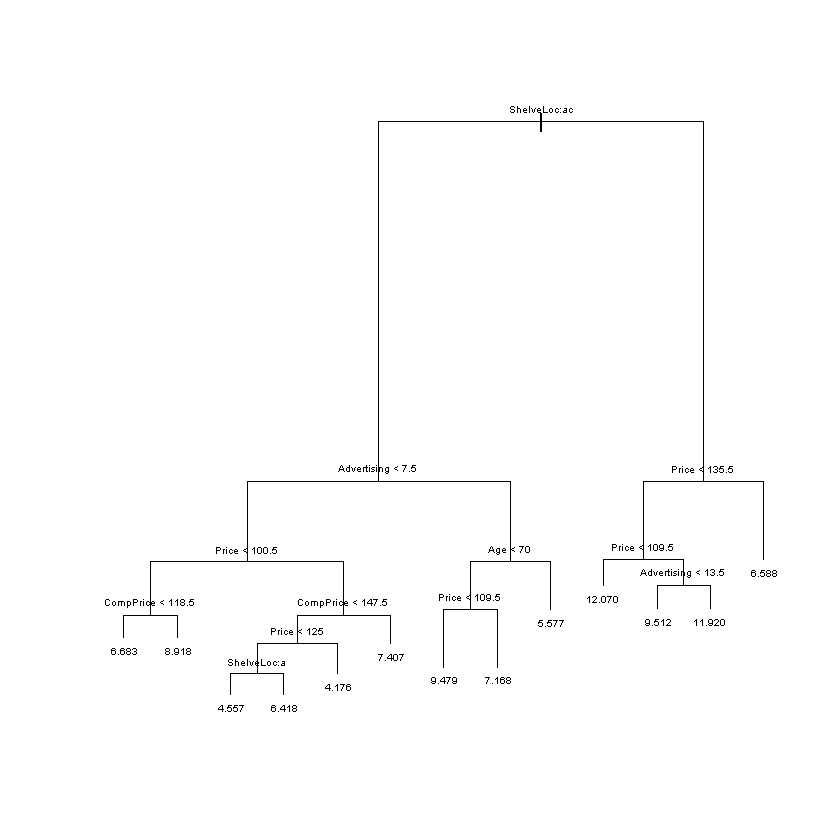

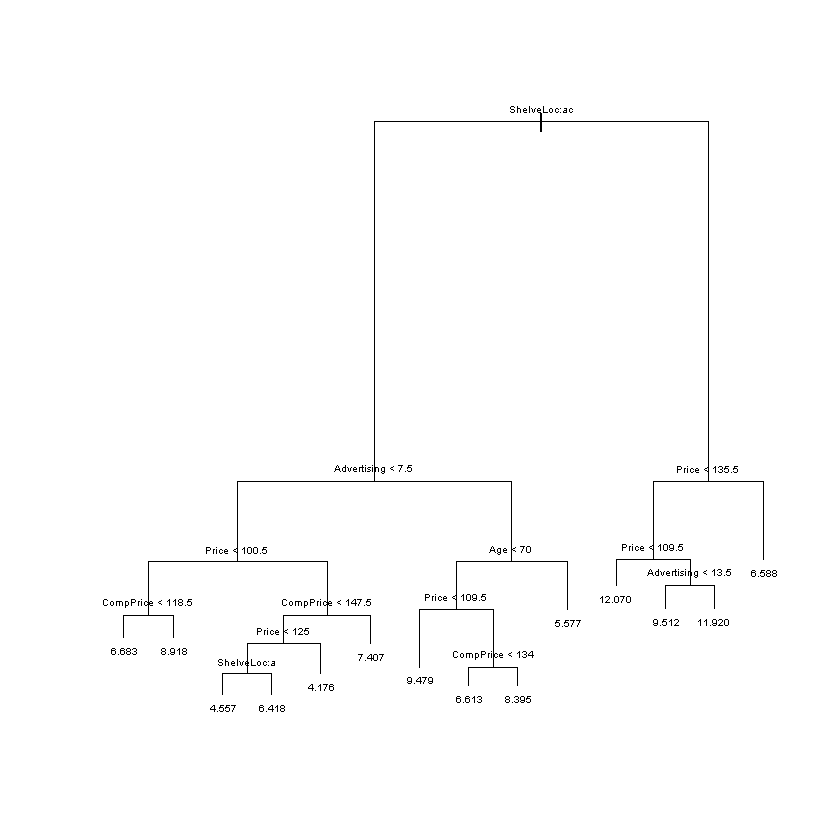

In [11]:
n=14
num=rep(NA, n)
error = rep(NA, n)
for(i in 2:n){
    prune.carseats=prune.tree(tree.carseats,best=i)
    prune.pred=predict(prune.carseats, Carseats.test)
    plot(prune.carseats)
    text(prune.carseats, cex=.5)
    error[i]=mean((prune.pred-Carseats$Sales[test])^2)
    }

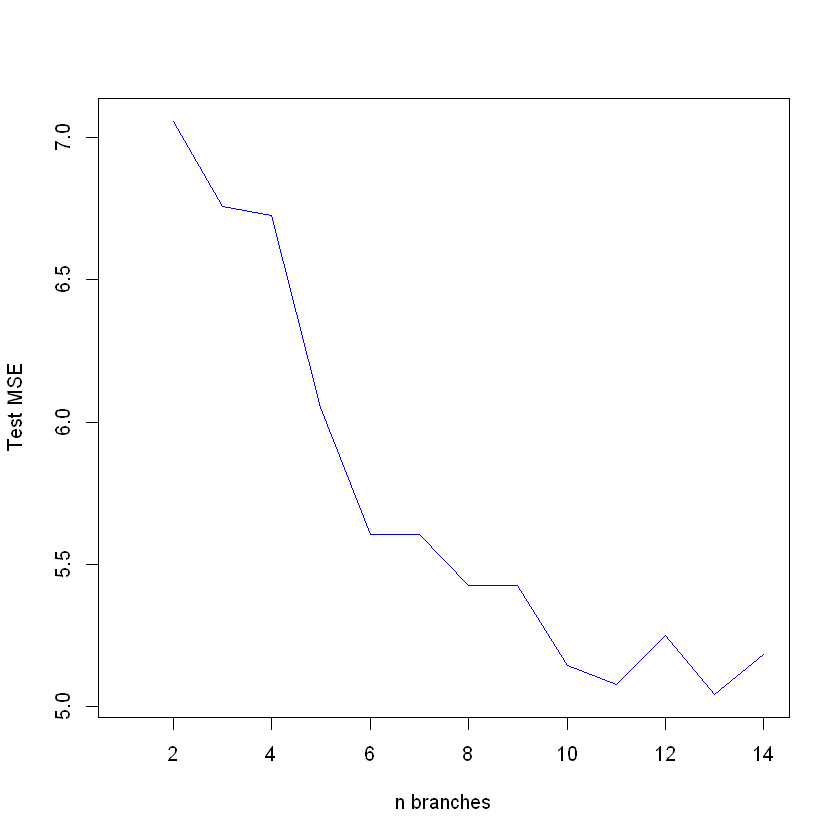

In [12]:
plot(1:n, error,  xlab = 'n branches', ylab = 'Test MSE', type = 'l', col="blue")

For test the best number branches is 9.

[1] 5.183118

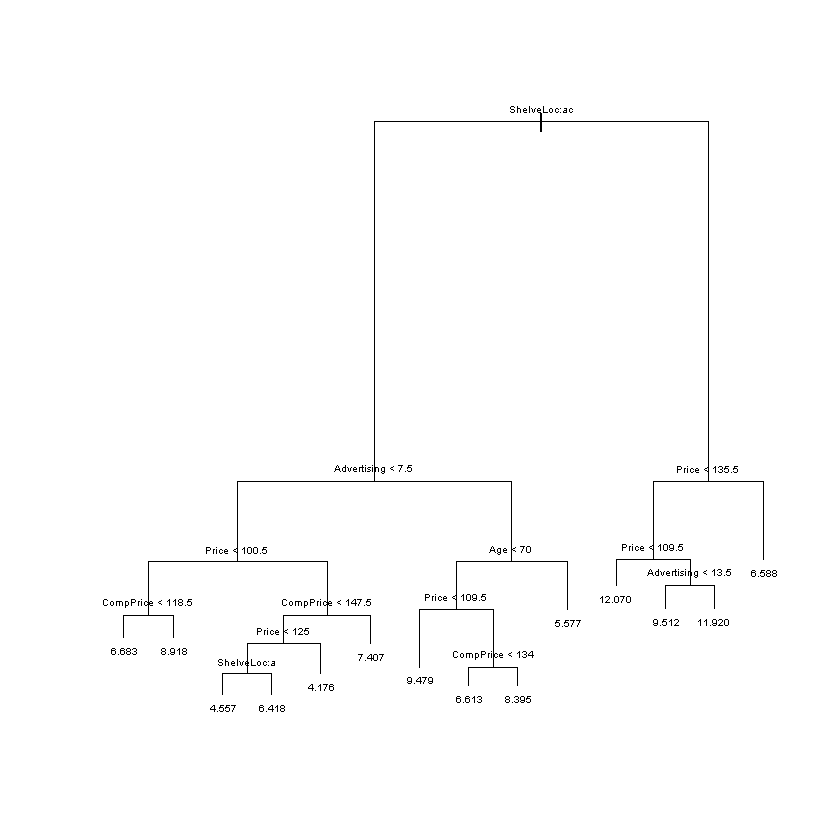

In [13]:
prune.carseats=prune.tree(tree.carseats,best=14)
prune.pred=predict(prune.carseats, Carseats.test)
plot(prune.carseats)
text(prune.carseats, cex=.5)
mean((prune.pred-Carseats$Sales[test])^2)

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine which variables are most important.

In [14]:
set.seed(1)
bag.carseats= randomForest(Sales∼.,data=Carseats.train, mtry=10, importance =TRUE)
bag.carseats


Call:
 randomForest(formula = Sales ~ ., data = Carseats.train, mtry = 10,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.481788
                    % Var explained: 67.45

In [15]:
pred.carseats = predict(bag.carseats, newdata = Carseats.test)
mean((pred.carseats - Carseats$Sales[test])^2)

[1] 2.995796

MSE is improved

In [16]:
importance (bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,30.2123568,197.051896
Income,9.8707270,126.184753
Advertising,23.4976350,147.985578
Population,-2.8748028,62.753633
Price,59.3195031,474.956746
ShelveLoc,73.2325194,703.720164
Age,20.1758940,189.682506
Education,2.1015965,63.802962
Urban,-0.5791662,10.925591
US,3.1296417,8.842788


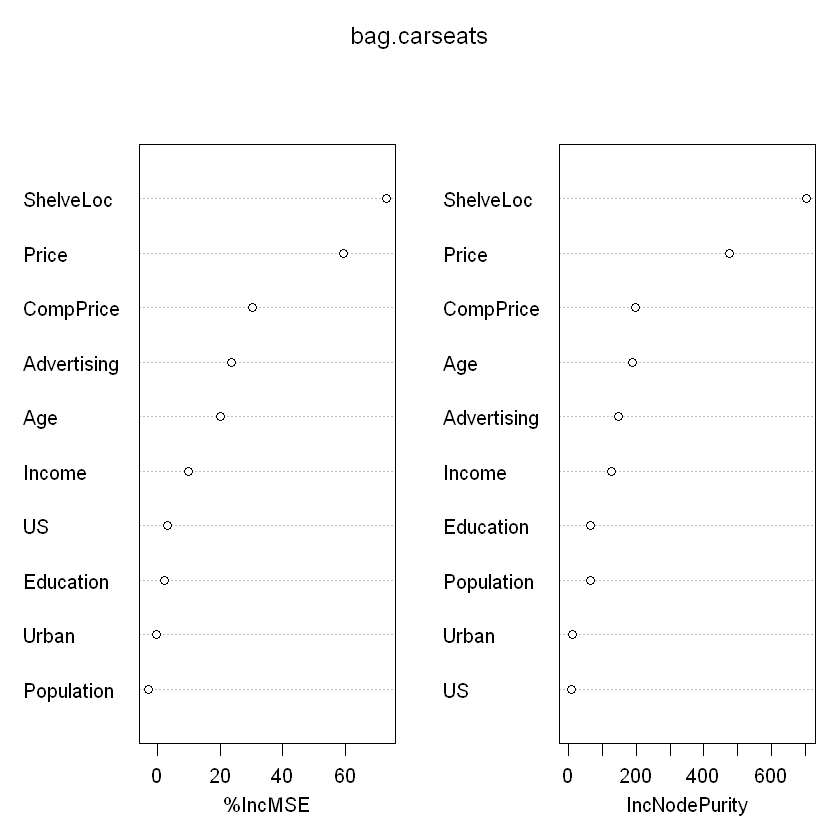

In [17]:
varImpPlot(bag.carseats)

(e) Use random forests to analyze this data. What test MSE do you
obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.

In [18]:
set.seed(1)
n=10
error=rep(NA, n)
for (i in 1:10){
rf.carseats= randomForest(Sales∼.,data=Carseats.train, mtry=i, importance =TRUE)
rf.carseats
pred.carseats = predict(rf.carseats, newdata = Carseats.test)
error[i]=mean((pred.carseats - Carseats$Sales[test])^2)
}

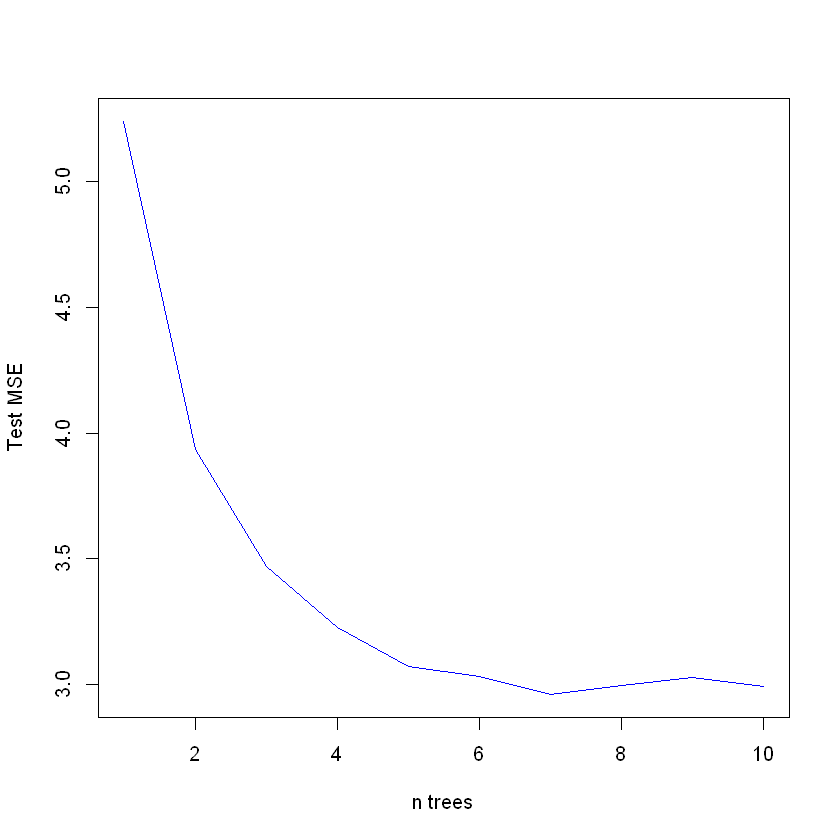

In [19]:
plot(1:n, error,  xlab = 'n trees', ylab = 'Test MSE', type = 'l', col="blue")

In [20]:
min(error)

[1] 2.959561

## Problem 9

In [21]:
?OJ

In [22]:
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [23]:
train = sample (1:nrow(OJ), 800)
OJ.train = OJ[train,]
OJ.test = OJ[-train,]

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?

In [24]:
tree.OJ = tree(Purchase∼., OJ.train)
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  8 
Residual mean deviance:  0.7541 = 597.3 / 792 
Misclassification error rate: 0.16 = 128 / 800 

(c) Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.

In [25]:
tree.OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1070.00 CH ( 0.61000 0.39000 )  
   2) LoyalCH < 0.50395 351  421.30 MM ( 0.28775 0.71225 )  
     4) LoyalCH < 0.276142 171  127.40 MM ( 0.12281 0.87719 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 112  105.10 MM ( 0.17857 0.82143 ) *
     5) LoyalCH > 0.276142 180  247.30 MM ( 0.44444 0.55556 )  
      10) PriceDiff < 0.065 75   80.28 MM ( 0.22667 0.77333 ) *
      11) PriceDiff > 0.065 105  141.30 CH ( 0.60000 0.40000 ) *
   3) LoyalCH > 0.50395 449  360.50 CH ( 0.86192 0.13808 )  
     6) LoyalCH < 0.753545 184  217.20 CH ( 0.72283 0.27717 )  
      12) PriceDiff < -0.165 34   41.19 MM ( 0.29412 0.70588 ) *
      13) PriceDiff > -0.165 150  141.40 CH ( 0.82000 0.18000 )  
        26) SalePriceMM < 2.125 89  103.80 CH ( 0.73034 0.26966 ) *
        27) SalePriceMM > 2.125 61   23.92 CH ( 0.95082 0.04918 ) *
     7) LoyalCH > 0.753545 265   91.54 

Node 4. The split criterion is Customer brand loyalty for CH juice < 0.276142, number of observations is 171. It is a terminal node because of the asterisk. The deviance is 127.4. About 12% of the observations in that branch take the value of CH, and the remaining 87.7% take the value of MM.



(d) Create a plot of the tree, and interpret the results

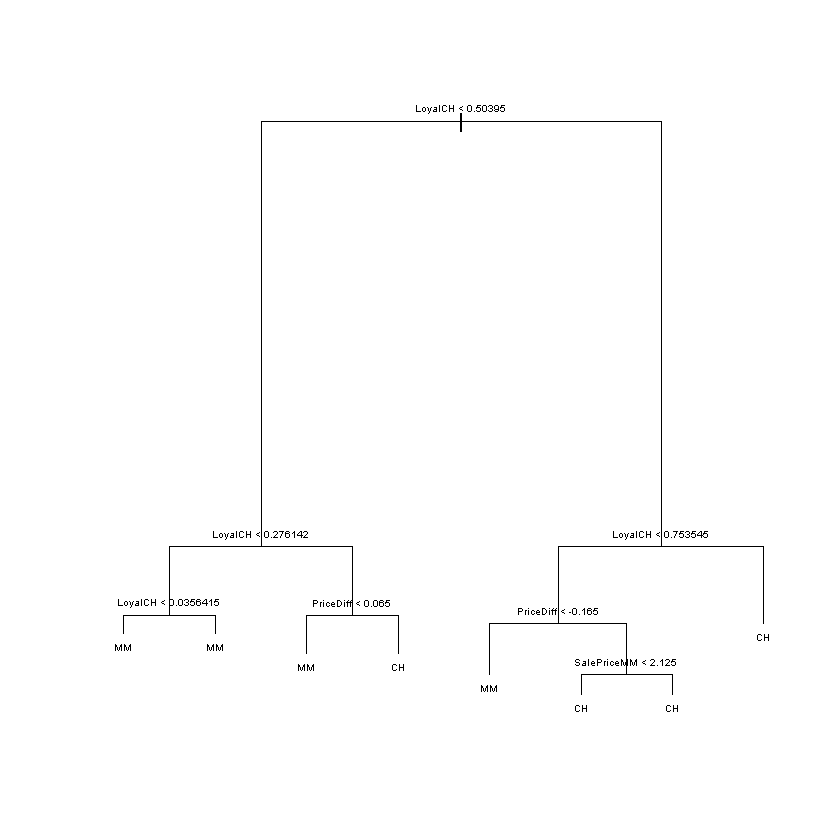

In [26]:
plot(tree.OJ)
text(tree.OJ, cex=.5)

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [27]:
tree.pred=predict(tree.OJ, newdata=OJ.test,  type = "class")
cm=table(tree.pred , OJ.test$Purchase)
cm

         
tree.pred  CH  MM
       CH 152  34
       MM  13  71

In [28]:
#Misclassified
(cm[2]+cm[3])/dim(OJ.test)[1]

[1] 0.1740741

(f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.


In [29]:
cv.OJ=cv.tree(tree.OJ, FUN = prune.misclass)
cv.OJ

$size
[1] 8 6 4 2 1

$dev
[1] 140 140 158 170 312

$k
[1]  -Inf   0.0   7.0  10.5 149.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

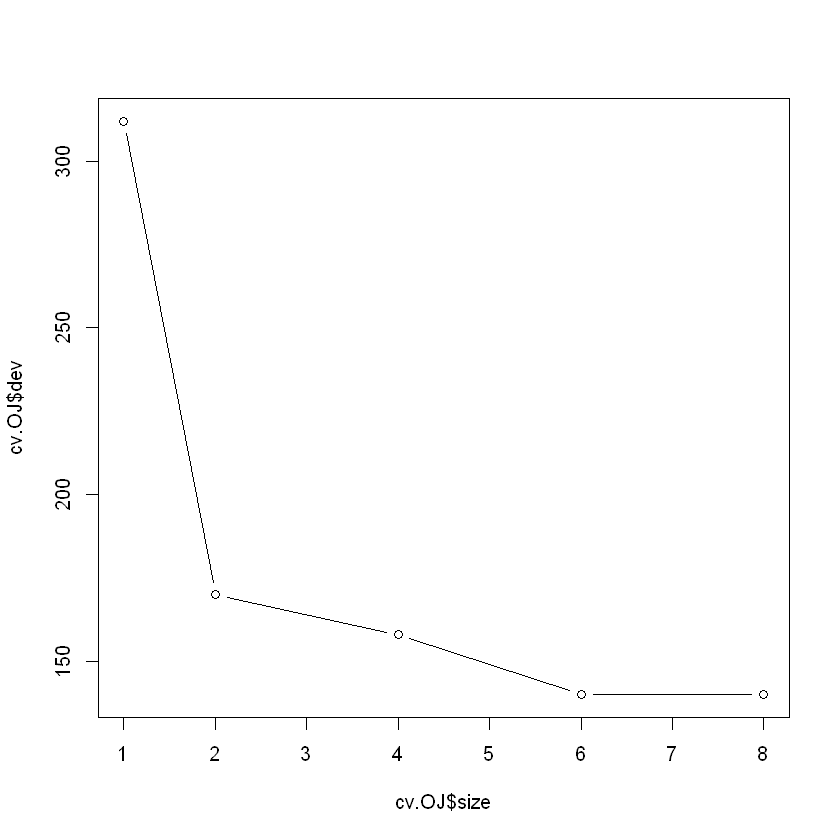

In [30]:
plot(cv.OJ$size ,cv.OJ$dev ,type='b')

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

size 4

(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes

In [41]:
prune.OJ=prune.tree(tree.OJ,best=6)
prune.pred=predict(prune.OJ, OJ.test, type='class')
cm=table(prune.pred , OJ.test$Purchase)
cm

          
prune.pred  CH  MM
        CH 152  34
        MM  13  71

In [42]:
#Misclassified
(cm[2]+cm[3])/dim(OJ.test)[1]

[1] 0.1740741

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [33]:
summary(prune.OJ)


Classification tree:
snip.tree(tree = tree.OJ, nodes = 4:6)
Variables actually used in tree construction:
[1] "LoyalCH"
Number of terminal nodes:  4 
Residual mean deviance:  0.8586 = 683.4 / 796 
Misclassification error rate: 0.2037 = 163 / 800 

In [34]:
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  8 
Residual mean deviance:  0.7541 = 597.3 / 792 
Misclassification error rate: 0.16 = 128 / 800 

For pruned tree misclassification train error is a bit higher

(k) Compare the test error rates between the pruned and unpruned
trees. Which is higher?

Test error is the same for pruned tree

## Problem 10

In [74]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.

In [75]:
df_Hitters=Hitters[!is.na(Hitters$Salary), ]
df_Hitters$Salary = log(df_Hitters$Salary)

b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations

In [76]:
train=1:200
df_train=df_Hitters[train,]
df_test = df_Hitters[-train,]

(c) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis

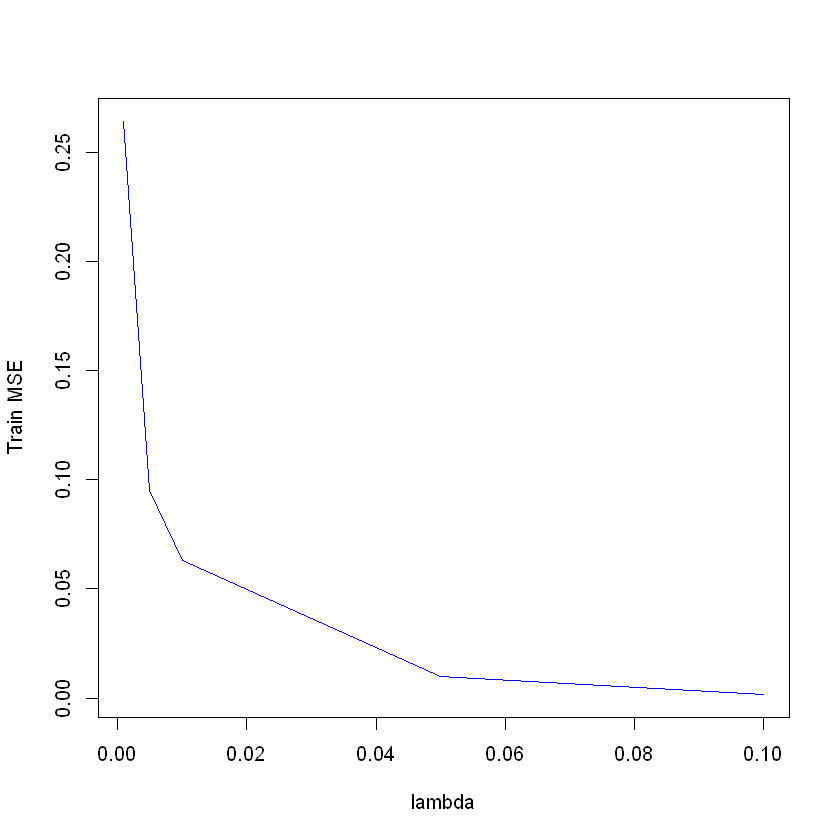

In [104]:
set.seed(1)
error=rep(NA, 5)
for(i in 1:5){
    lambda = c(0.1, 0.05, 0.01, 0.005, 0.001)
    boost.Hitters=gbm(Salary ∼.,data=df_train, distribution="gaussian", n.trees=1000, interaction.depth=4, shrinkage = lambda[i])
    pred = predict(boost.Hitters, df_train, n.trees=1000)
    error[i] = mean((pred-df_train$Salary)^2)
}
plot(lambda, error, xlab = 'lambda', ylab = 'Train MSE', type = 'l', col="blue")

In [105]:
min(error)
which.min(error)

[1] 0.001537196

[1] 1

(d)Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

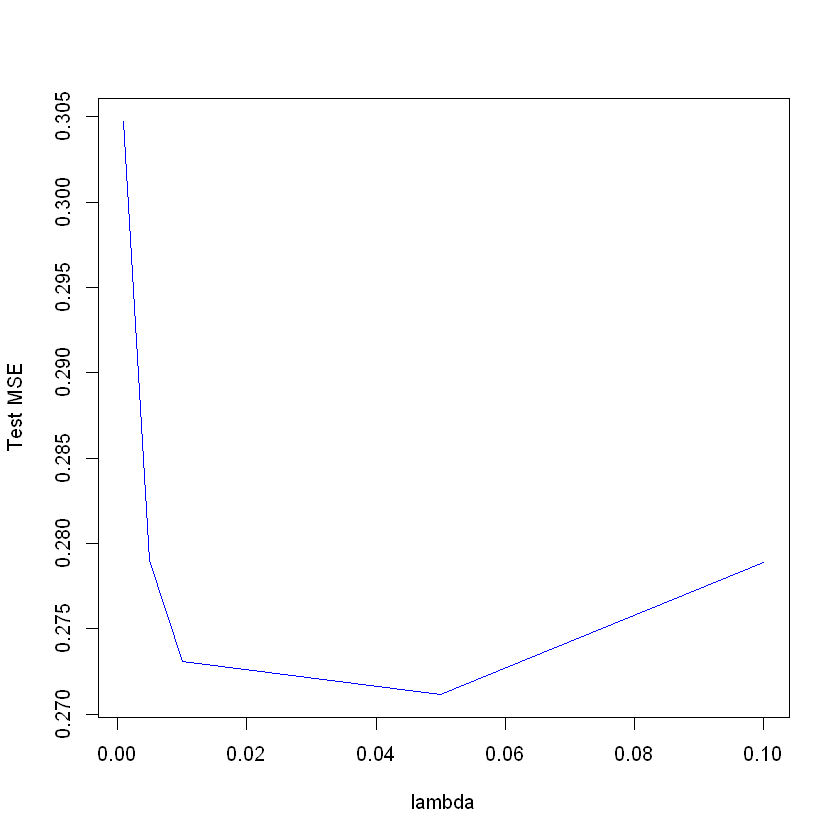

In [80]:
set.seed(1)
error=rep(NA, 5)
for(i in 1:5){
    lambda = c(0.1, 0.05, 0.01, 0.005, 0.001)
    boost.Hitters=gbm(Salary ∼.,data=df_train, distribution="gaussian", n.trees=1000, interaction.depth=4, shrinkage = lambda[i])
    pred = predict(boost.Hitters, df_test, n.trees=1000)
    error[i] = mean((pred-df_test$Salary)^2)
}
plot(lambda, error, xlab = 'lambda', ylab = 'Test MSE', type = 'l', col="blue")

In [81]:
min(error)
lambda[which.min(error)]

[1] 0.2711458

[1] 0.05

(e) Compare the test MSE of boosting to the test MSE that results
from applying two of the regression approaches seen in
Chapters 3 and 6.

In [82]:
lm.fit = lm(Salary ~ ., data = df_train)
pred1 = predict(lm.fit, df_test)
mean((pred1 - df_test$Salary)^2)

[1] 0.4917959

In [89]:
m = model.matrix(Salary ~ ., data = df_train)
m.test = model.matrix(Salary ~ ., data = df_test)
y = df_train$Salary
lasso.fit = glmnet(m, y, alpha = 1)
lasso_pred = predict(lasso.fit, s = 0.05, newx = m.test)
mean((lasso_pred - df_test$Salary)^2)

[1] 0.4485668

Linear regression and Lasso errors are larger on test than for boosting 

(f) Which variables appear to be the most important predictors in
the boosted model?

,var,rel.inf
CAtBat,CAtBat,16.2340222
CHits,CHits,12.1414560
CWalks,CWalks,9.5498092
CRBI,CRBI,9.5415780
Years,Years,6.7652337
PutOuts,PutOuts,6.7516744
Walks,Walks,5.9215654
CHmRun,CHmRun,5.5354326
RBI,RBI,4.7670135
CRuns,CRuns,3.9740767


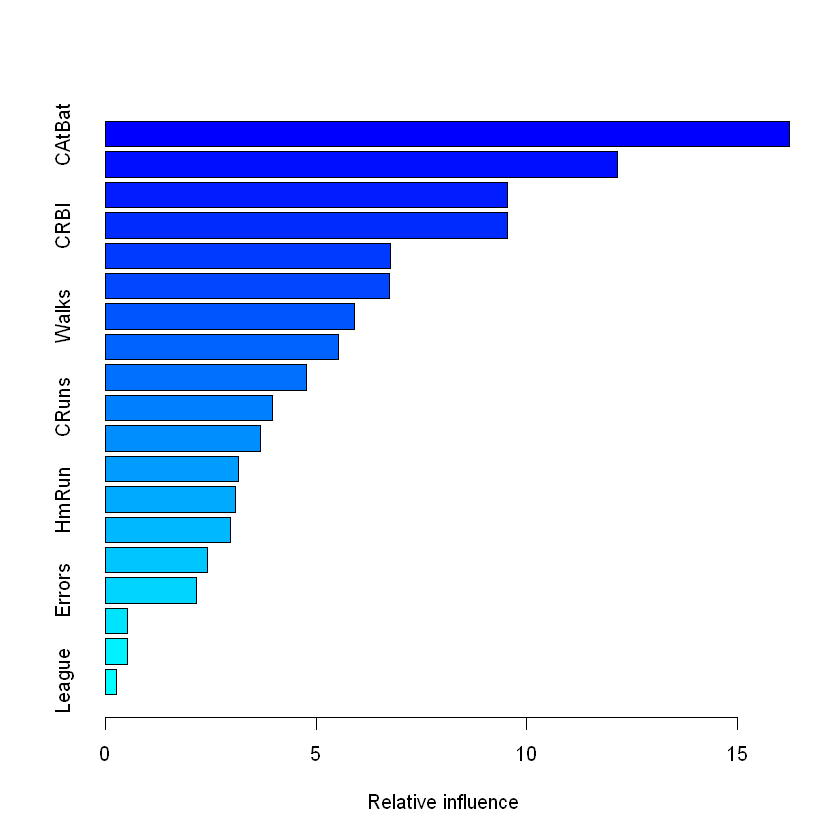

In [95]:
boost.hitters <- gbm(Salary ~ ., data = df_train, distribution = "gaussian", n.trees = 1000, shrinkage = lambda[which.min(error)])
summary(boost.hitters)

CatBat is most impotant feature

(g) Now apply bagging to the training set. What is the test set MSE
for this approach?

In [101]:
set.seed(1)
bag.hitters= randomForest(Salary∼.,data=df_train, mtry=19, importance =TRUE)
bag.hitters


Call:
 randomForest(formula = Salary ~ ., data = df_train, mtry = 19,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 19

          Mean of squared residuals: 0.2178554
                    % Var explained: 73.82

In [103]:
pred.hitters = predict(bag.hitters, newdata = df_test)
mean((pred.hitters - df_test$Salary)^2)

[1] 0.2301184

Bagging gives a bit lower error on test and higher on train. Boosting is overfitting more on training.